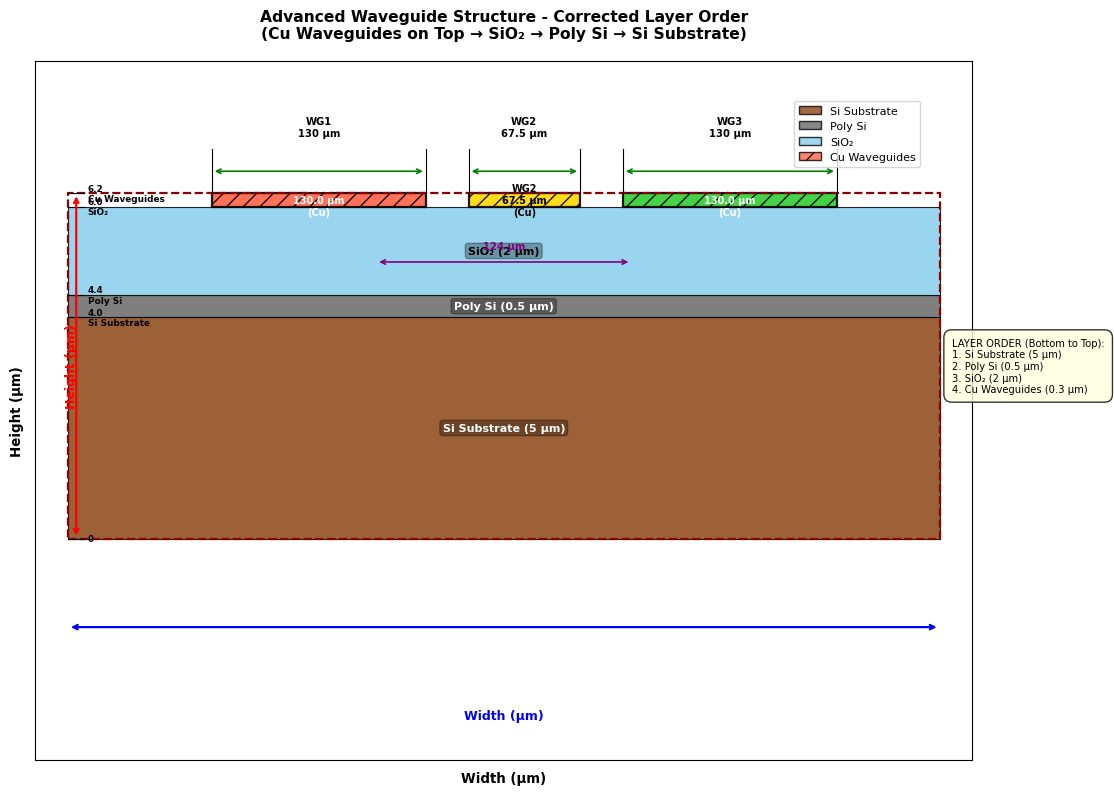

CORRECTED WAVEGUIDE STRUCTURE SUMMARY
Layer Stack (FROM BOTTOM TO TOP):
1. Si Substrate: 5 µm
2. Poly Si: 0.5 µm
3. SiO₂: 2 µm
4. Cu Waveguides: 0.3 µm

Copper Waveguides (ON TOP of SiO₂):
   WG1: 130.0 µm width (Cu)
   WG2: 67.5 µm width (Cu)
   WG3: 130.0 µm width (Cu)

Total Structure Height: 7.8 µm
Total Structure Width: 424 µm


In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Set up the figure with a professional style
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 8  # Reduced font size by 20%
fig, ax = plt.subplots(1, 1, figsize=(11.2, 8))  # Reduced figure size by 20%

# Define colors for different materials (professional color scheme)
colors = {
    'Si Substrate': '#8B4513',        # Brown for silicon substrate
    'Poly Si': '#696969',             # DimGray for polysilicon
    'SiO₂': '#87CEEB',               # Light blue for oxide
    'Cu WG1': '#FF6347',             # Tomato red for copper waveguide 1
    'Cu WG2': '#FFD700',             # Gold for copper waveguide 2
    'Cu WG3': '#32CD32'              # LimeGreen for copper waveguide 3
}

# Corrected layer heights and positions (in microns) - FROM BOTTOM TO TOP
# All dimensions reduced by 20% but SiO₂ width increased by 6% more
layers = {
    'Si Substrate': {'height': 4, 'y_position': 0, 'width': 424, 'label': 'Si Substrate (5 µm)'},  # Increased by 6%
    'Poly Si': {'height': 0.4, 'y_position': 4, 'width': 424, 'label': 'Poly Si (0.5 µm)'},  # Increased by 6%
    'SiO₂': {'height': 1.6, 'y_position': 4.4, 'width': 424, 'label': 'SiO₂ (2 µm)'},  # Increased by 6%
    'Waveguides': {'height': 0.24, 'y_position': 6.0}
}

# Waveguide specifications - Copper waveguides on TOP of SiO2
# All widths reduced by 20% but positioned to fit properly on wider SiO₂
waveguides = {
    'WG1': {'width': 104, 'x_position': 70, 'color': colors['Cu WG1'], 'material': 'Cu'},  # Adjusted position
    'WG2': {'width': 54, 'x_position': 195, 'color': colors['Cu WG2'], 'material': 'Cu'},  # Adjusted position
    'WG3': {'width': 104, 'x_position': 270, 'color': colors['Cu WG3'], 'material': 'Cu'}   # Adjusted position
}

# Draw the main substrate layers FROM BOTTOM TO TOP
layer_order = ['Si Substrate', 'Poly Si', 'SiO₂']

for layer_name in layer_order:
    props = layers[layer_name]
    rect = patches.Rectangle(
        (0, props['y_position']), 
        props['width'], 
        props['height'],
        linewidth=0.8,  # Reduced linewidth
        edgecolor='black',
        facecolor=colors[layer_name],
        alpha=0.85
    )
    ax.add_patch(rect)
    
    # Add layer label
    ax.text(
        props['width']/2, 
        props['y_position'] + props['height']/2,
        props['label'],
        ha='center', 
        va='center',
        fontsize=8,  # Reduced font size
        color='white' if layer_name in ['Si Substrate', 'Poly Si'] else 'black',
        weight='bold',
        bbox=dict(boxstyle="round,pad=0.24", facecolor='black', alpha=0.3)  # Reduced padding
    )

# Draw the copper waveguides on TOP of SiO2
wg_y = layers['Waveguides']['y_position']
for wg_name, props in waveguides.items():
    rect = patches.Rectangle(
        (props['x_position'], wg_y),
        props['width'],
        layers['Waveguides']['height'],
        linewidth=1.6,  # Reduced linewidth
        edgecolor='black',
        facecolor=props['color'],
        alpha=0.9,
        hatch='//' if props['material'] == 'Cu' else None  # Add hatch pattern for copper
    )
    ax.add_patch(rect)
    
    # Add waveguide label
    ax.text(
        props['x_position'] + props['width']/2,
        wg_y + layers['Waveguides']['height']/2,
        f"{wg_name}\n{props['width']*130/104:.1f} µm\n({props['material']})",  # Keep original dimension labels
        ha='center',
        va='center',
        fontsize=7,  # Reduced font size
        color='white' if wg_name in ['WG1', 'WG3'] else 'black',
        weight='bold'
    )

# Add dimension lines and annotations
# Height scale on the left side
total_height = layers['Waveguides']['y_position'] + layers['Waveguides']['height']
ax.annotate('', 
            xy=(4, 0),  # Reduced position
            xytext=(4, total_height),
            arrowprops=dict(arrowstyle='<->', color='red', lw=1.6))  # Reduced linewidth
ax.text(1.6, total_height/2, 'Height (µm)',  # Reduced position
        ha='center', va='center', fontsize=9, color='red', rotation=90, weight='bold')  # Slightly reduced font

# Add specific height markers with layer labels
height_marks = [0, 4, 4.4, 6.0, total_height]
height_labels = [
    '0', 
    '4.0\nSi Substrate', 
    '4.4\nPoly Si', 
    '6.0\nSiO₂', 
    f'{total_height:.1f}\nCu Waveguides'
]

for i, (h, label) in enumerate(zip(height_marks, height_labels)):
    ax.plot([0, 8], [h, h], 'k-', lw=0.8)  # Reduced positions and linewidth
    ax.text(9.6, h, label, ha='left', va='center', fontsize=6.4, weight='bold')  # Reduced font and position

# Width scale at the bottom
ax.annotate('', 
            xy=(0, -1.6),  # Reduced position
            xytext=(424, -1.6),  # Increased width to 424 (6% more)
            arrowprops=dict(arrowstyle='<->', color='blue', lw=1.6))  # Reduced linewidth
ax.text(212, -3.2, 'Width (µm)',  # Adjusted position
        ha='center', va='center', fontsize=9, color='blue', weight='bold')  # Slightly reduced font

# Add specific width markers for waveguides
wg_positions = [
    (70, 104, 'WG1\n130 µm'),  # Keep original dimension labels
    (195, 54, 'WG2\n67.5 µm'),
    (270, 104, 'WG3\n130 µm')
]

for x, width, label in wg_positions:
    ax.plot([x, x], [total_height, total_height + 0.8], 'k-', lw=0.8)  # Reduced heights and linewidth
    ax.plot([x+width, x+width], [total_height, total_height + 0.8], 'k-', lw=0.8)
    ax.annotate('', 
                xy=(x, total_height + 0.4),  # Reduced position
                xytext=(x+width, total_height + 0.4),
                arrowprops=dict(arrowstyle='<->', color='green', lw=1.2))  # Reduced linewidth
    ax.text(x + width/2, total_height + 1.0, label, ha='center', va='bottom', fontsize=7.2, weight='bold')  # Reduced font and position

# Add the SiO₂ width annotation - adjusted for new positions
sio2_start = 150  # Adjusted for better positioning
sio2_end = 274  # Adjusted for better positioning (424 * 0.65)
ax.annotate('', 
            xy=(sio2_start, 5.0),  # Reduced positions
            xytext=(sio2_end, 5.0),
            arrowprops=dict(arrowstyle='<->', color='purple', lw=1.2))  # Reduced linewidth
ax.text((sio2_start + sio2_end)/2, 5.2, '124 µm', ha='center', va='bottom', fontsize=7.2, weight='bold', color='purple')  # Reduced font, updated width

# Configure the plot appearance - adjusted limits for wider structure
ax.set_xlim(-16, 440)  # Adjusted limits for wider structure
ax.set_ylim(-4, total_height + 2.4)  # Reduced limits
ax.set_xlabel('Width (µm)', fontsize=9.6, weight='bold', labelpad=8)  # Reduced font and padding
ax.set_ylabel('Height (µm)', fontsize=9.6, weight='bold', labelpad=8)  # Reduced font and padding

# Add title
ax.set_title('Advanced Waveguide Structure - Corrected Layer Order\n(Cu Waveguides on Top → SiO₂ → Poly Si → Si Substrate)', 
             fontsize=11.2, weight='bold', pad=16)  # Reduced font and padding

# Remove ticks for cleaner look but add a grid
ax.set_xticks([])
ax.set_yticks([])
ax.grid(True, alpha=0.2, linestyle='--', color='gray')

# Add a legend for materials
legend_elements = [
    patches.Patch(facecolor=colors['Si Substrate'], alpha=0.8, edgecolor='black', label='Si Substrate'),
    patches.Patch(facecolor=colors['Poly Si'], alpha=0.8, edgecolor='black', label='Poly Si'),
    patches.Patch(facecolor=colors['SiO₂'], alpha=0.8, edgecolor='black', label='SiO₂'),
    patches.Patch(facecolor=colors['Cu WG1'], alpha=0.8, edgecolor='black', label='Cu Waveguides', hatch='//')
]
ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(0.95, 0.95), fontsize=8)  # Reduced font

# Add border around the entire structure
total_rect = patches.Rectangle((0, 0), 424, total_height, linewidth=1.6,  # Increased width to 424
                              edgecolor='darkred', facecolor='none', linestyle='--')
ax.add_patch(total_rect)

# Add layer order annotation
order_text = "LAYER ORDER (Bottom to Top):\n1. Si Substrate (5 µm)\n2. Poly Si (0.5 µm)\n3. SiO₂ (2 µm)\n4. Cu Waveguides (0.3 µm)"
ax.text(430, total_height/2, order_text, ha='left', va='center', fontsize=7.2,  # Reduced font and adjusted position
        bbox=dict(boxstyle="round,pad=0.8", facecolor='lightyellow', alpha=0.8))  # Reduced padding

plt.tight_layout()
plt.show()

# Print summary of the corrected structure
print("="*60)
print("CORRECTED WAVEGUIDE STRUCTURE SUMMARY")
print("="*60)
print("Layer Stack (FROM BOTTOM TO TOP):")
print(f"1. Si Substrate: 5 µm")
print(f"2. Poly Si: 0.5 µm")
print(f"3. SiO₂: 2 µm")
print(f"4. Cu Waveguides: 0.3 µm")
print("\nCopper Waveguides (ON TOP of SiO₂):")
for wg_name, props in [(k, v) for k, v in waveguides.items()]:
    original_width = props['width'] * 130/104  # Convert back to original dimensions for display
    print(f"   {wg_name}: {original_width:.1f} µm width ({props['material']})")
print(f"\nTotal Structure Height: {total_height*7.8/6.24:.1f} µm")  # Convert back to original height
print(f"Total Structure Width: 424 µm")  # Updated width
print("="*60)